In [26]:
import torch.nn.functional as F
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [95]:
kernels = []
for i in range(3):
    kernels.append(torch.tensor([[-1, -1, -1],
              [-1, 8, -1],
             [-1, -1, -1]]))
kernel = torch.stack(kernels).unsqueeze(0).float().repeat(3,1,1,1)
kernel

tensor([[[[-1., -1., -1.],
          [-1.,  8., -1.],
          [-1., -1., -1.]],

         [[-1., -1., -1.],
          [-1.,  8., -1.],
          [-1., -1., -1.]],

         [[-1., -1., -1.],
          [-1.,  8., -1.],
          [-1., -1., -1.]]],


        [[[-1., -1., -1.],
          [-1.,  8., -1.],
          [-1., -1., -1.]],

         [[-1., -1., -1.],
          [-1.,  8., -1.],
          [-1., -1., -1.]],

         [[-1., -1., -1.],
          [-1.,  8., -1.],
          [-1., -1., -1.]]],


        [[[-1., -1., -1.],
          [-1.,  8., -1.],
          [-1., -1., -1.]],

         [[-1., -1., -1.],
          [-1.,  8., -1.],
          [-1., -1., -1.]],

         [[-1., -1., -1.],
          [-1.,  8., -1.],
          [-1., -1., -1.]]]])

torch.Size([1, 3, 1349, 1012])


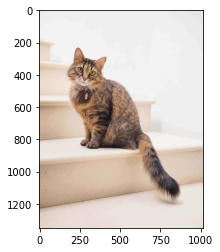

In [96]:
x1 = cv2.imread('img/cat.jpg')
x = x1.transpose(2,0,1)
x = torch.from_numpy(x).unsqueeze(0).float()
print(x.shape)
x1 = np.flip(x1, axis=-1) #bgr转rgb
plt.imshow(x1)

In [117]:
gaussian = F.conv2d(x,kernel,stride=3)

In [118]:
x

tensor([[[[234., 234., 234.,  ..., 230., 230., 230.],
          [234., 234., 234.,  ..., 230., 230., 230.],
          [234., 234., 234.,  ..., 230., 230., 230.],
          ...,
          [197., 197., 197.,  ..., 208., 208., 208.],
          [197., 197., 197.,  ..., 208., 208., 208.],
          [197., 197., 197.,  ..., 208., 208., 208.]],

         [[234., 234., 234.,  ..., 230., 230., 230.],
          [234., 234., 234.,  ..., 230., 230., 230.],
          [234., 234., 234.,  ..., 230., 230., 230.],
          ...,
          [210., 210., 210.,  ..., 210., 210., 210.],
          [210., 210., 210.,  ..., 210., 210., 210.],
          [210., 210., 210.,  ..., 210., 210., 210.]],

         [[234., 234., 234.,  ..., 230., 230., 230.],
          [234., 234., 234.,  ..., 230., 230., 230.],
          [234., 234., 234.,  ..., 230., 230., 230.],
          ...,
          [226., 226., 226.,  ..., 228., 228., 228.],
          [226., 226., 226.,  ..., 228., 228., 228.],
          [226., 226., 226.,  ...

In [119]:
gaussian

tensor([[[[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 9.,  9.,  6.,  ...,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  9.,  9.,  9.],
          [ 0.,  0., -9.,  ...,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 9.,  9.,  6.,  ...,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  9.,  9.,  9.],
          [ 0.,  0., -9.,  ...,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 9.,  9.,  6.,  ...,  0.,  0.,  0.],
          ...,
          [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  ...,  9.,  9.,  9.],
          [ 0.,  0., -9.,  ...,  0.,  0.,  0.]]]])

In [120]:
gaussian.shape

torch.Size([1, 3, 449, 337])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


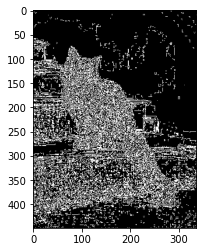

In [121]:
plt.imshow(gaussian.squeeze(0).numpy().transpose(1,2,0))